In [36]:
using CLOUD
using OrdinaryDiffEq
using LinearAlgebra
results_path = "../results/burgers_dgsem_1D_test/";

In [37]:
A = 1.0  # amplitude
L = 1.0  # domain length
k = 2*π/L  # wave number
T = 3.0  # end time
initial_data = InitialDataSine(A,k)
conservation_law = burgers_equation(
    numerical_flux=EntropyConservativeNumericalFlux{BurgersFlux{1}}(),
    two_point_flux=EntropyConservativeFlux{BurgersFlux{1}}());

In [38]:
M = 20  # number of elements
p = 7  # degree of discretization

reference_approximation = ReferenceApproximation(
    DGSEM(p), Line(), N_plot=20)
spatial_discretization = SpatialDiscretization(uniform_periodic_mesh(
    reference_approximation.reference_element, 
    (0.0,L), M), reference_approximation)
form = StrongFluxDiffForm()
strategy = Eager()
solver = Solver(conservation_law, spatial_discretization, form, strategy)
conservation_analysis = PrimaryConservationAnalysis(results_path, 
    conservation_law, spatial_discretization)
energy_analysis = EnergyConservationAnalysis(results_path, 
    conservation_law, spatial_discretization)
results_path = save_project(conservation_law,
     spatial_discretization, initial_data, form, 
     (0.0, T), strategy, results_path, overwrite=true, clear=true);

In [39]:
n_s = 10
dt_scale = 0.05
dt = dt_scale*(L/M)/(1.0*(2*p+1))
ode_problem = semidiscretize(load_project(results_path)...)
save_solution(ode_problem.u0, 0.0, results_path, 0)
sol = solve(ode_problem, RK4(), adaptive=false, 
    dt=dt, save_everystep=false,
    callback=save_callback(results_path, ceil(Int, T/(dt*n_s))))
save_solution(last(sol.u), last(sol.t), results_path, "final");
plotter = Plotter(spatial_discretization, results_path)
visualize(last(sol.u), plotter, "solution.pdf", exact_solution=initial_data,
    label="U^h(x,t)", label_exact="U(x,t)")

save_solution(last(sol.u), last(sol.t), results_path, "final");

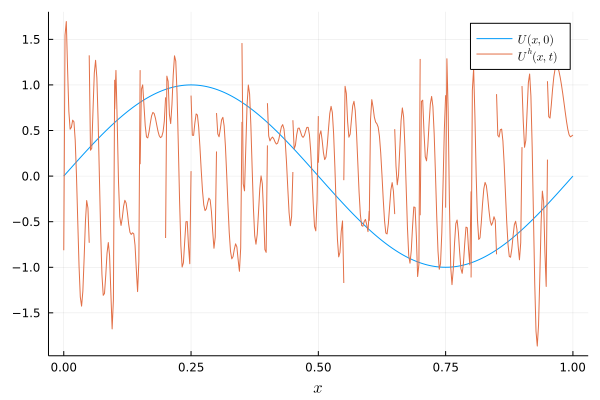

In [40]:
visualize(last(sol.u), plotter, "solution.pdf", exact_solution=initial_data,
    label="U^h(x,t)", label_exact="U(x,0)")

In [41]:
println("Conservation (initial/final/diff):\n", analyze(conservation_analysis)...)
println("Energy (initial/final/diff):\n",analyze(energy_analysis)...)

Conservation (initial/final/diff):
[-4.0766001685454967e-16][1.3740397708517094e-13][1.3781163710202549e-13]
Energy (initial/final/diff):
[0.5000000000000001][0.4999965710635912][-3.4289364089223895e-6]
